In [2]:
import numpy as np
import matplotlib.pyplot as plt

X X X X X X X X X X X X X X X X X X X X X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . ○ ○ . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . ● ● . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X X X X X X X X X X X X X X X X X X X X X




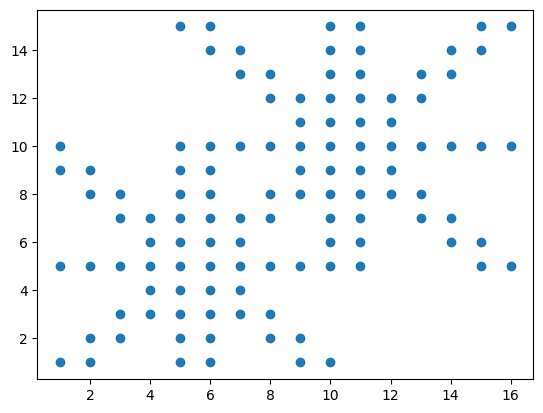

In [12]:




def positions_within_distance(x, y, distance=5):
    """Funcion que devuelve las posiciones dentro de un radio de distancia de la posicion (x,y)"""
    positions = []

    # Vertical positions above and below
    for d in range(1, distance+1):
        positions.append((x, y-d))  # Above
        positions.append((x, y+d))  # Below

    # Horizontal positions left and right
    for d in range(1, distance+1):
        positions.append((x-d, y))  # Left
        positions.append((x+d, y))  # Right

    # Diagonal positions
    for d in range(1, distance+1):
        positions.append((x-d, y-d))  # Top-left
        positions.append((x+d, y+d))  # Bottom-right
        positions.append((x-d, y+d))  # Bottom-left
        positions.append((x+d, y-d))  # Top-right

    # Remove positions that are out of bounds
    positions = [(x, y) for x, y in positions if 1 <= x < 21 and 1 <= y < 21]
    return positions




def posiciones_a_evaluar(board, player):
    """
    Funcion que devuelve las posiciones a evaluar para atacar y defender para 2 turnos seguidos
    devuelve una lista con forma [(m1,m2), (m1,m2), ...] donde m1 y m2 son tuplas con las posiciones x e y
    """
    positions_1 = get_occupied_positions(board, player= player) # Posiciones ocupadas por el jugador 1
    positions_2 = get_occupied_positions(board, player= 3-player) # Posiciones ocupadas por el jugador 2
    oc_pos = positions_1 + positions_2 # Posiciones ocupadas por ambos jugadores


    
    posiciones_atack, posiciones_defense = [], [] # Posiciones a evaluar para atacar y defender
    for x, y in positions_1:
        posiciones_atack.extend(positions_within_distance(x, y, 5))
    
    for x, y in positions_2:
        posiciones_defense.extend(positions_within_distance(x, y, 5))

    # Eliminar duplicados
    posiciones_atack = list(set(posiciones_atack))
    posiciones_defense = list(set(posiciones_defense))

    # Eliminar posiciones ocupadas
    posiciones_atack = [pos for pos in posiciones_atack if pos not in oc_pos]
    posiciones_defense = [pos for pos in posiciones_defense if pos not in oc_pos]
    
    return posiciones_atack, posiciones_defense

# Ejemplo de uso
board = np.zeros((21,21), dtype=int)
# Bordes a 3
board[0,:] = 3
board[-1,:] = 3
board[:,0] = 3
board[:,-1] = 3

# Posiciones ocupadas
board[5,5] = 1
board[5,6] = 1

board[10,10] = 2
board[10,11] = 2
display(board)


def get_positions_to_eval(board):
    """Funcion que devuelve las posiciones ocupadas por el jugador 1 o 2 juntas en una lista"""
    # Utilizar operaciones vectorizadas para encontrar las posiciones donde board es igual a 1 o 2
    oc_pos_1 = np.argwhere(board == 1)
    oc_pos_2 = np.argwhere(board == 2)
    oc_pos = np.concatenate((oc_pos_1, oc_pos_2), axis=0)
    
    unique_eval_pos = []
    for x, y in oc_pos:
        poslist = positions_within_distance(x, y, 5)
        # Añadir las posiciones que no esten ya en la lista
        for pos in poslist:
            if pos not in unique_eval_pos:
                unique_eval_pos.append(pos)

    return unique_eval_pos


positions = get_positions_to_eval(board)

plt.scatter([y for x, y in positions], [x for x, y in positions])
plt.show()




# a, d = posiciones_a_evaluar(board, player=1)

# # Mostrar las posiciones a evaluar
# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
# ax1.imshow(board)
# ax1.scatter([y for x, y in a], [x for x, y in a], color='red', label='Ataque')
# ax1.set_title("Posiciones a evaluar en ataque")
# ax1.legend()

# ax2.imshow(board)
# ax2.scatter([y for x, y in d], [x for x, y in d], color='blue', label='Defensa')
# ax2.set_title("Posiciones a evaluar en defensa")
# ax2.legend()
# plt.show()



# def score_position(board, x, y, player):
#     """Funcion que devuelve la puntuacion de la posicion (x,y) para el jugador indicado"""
#     directions = [
#         [(0, 1), (0, -1)],  # Vertical
#         [(1, 0), (-1, 0)],  # Horizontal
#         [(1, 1), (-1, -1)],  # Diagonal (from top-left to bottom-right)
#         [(1, -1), (-1, 1)]  # Diagonal (from top-right to bottom-left)
#     ]

#     def count_in_direction(x, y, dx, dy):
#         count = 0
#         for _ in range(6):  # Limit the search to 6 cells
#             if 0 <= x < len(board) and 0 <= y < len(board[0]) and board[x][y] == player:
#                 count += 1
#                 x += dx
#                 y += dy
#             else:
#                 break
#         return count
    
#     total_score = 0
#     for direction in directions:
#         count = 1  # The current position itself
#         for dx, dy in direction:
#             count += count_in_direction(x + dx, y + dy, dx, dy)
        
#         if count == 1:
#             total_score += 1
#         elif count == 2:
#             total_score += 10
#         elif count == 3:
#             total_score += 100
#         elif count == 4:
#             total_score += 1000
#         elif count == 5:
#             total_score += 10000
#         elif count >= 6:  # Winning condition
#             total_score += 100000

#     return total_score





    

    


# def eval_board(board, player=1):
#     # Obtener las posiciones a evaluar para atacar o defender
#     a, d = posiciones_a_evaluar(board, player=player)

#     # Crear una máscara de posiciones ocupadas
#     mask = np.ones((21,21), dtype=int)
#     occupied = np.where(board != 0)
#     mask[occupied] = 0
    
#     score_inicial = initial_gaussian_scoring_matrix()
    
#     ataque = score_inicial.copy()
#     defensa = score_inicial.copy()

#     for px, py in a:
#         ataque[px, py] = score_position(board, px, py, player=player) * score_inicial[px, py] * mask[px, py]
        
#     for px, py in d:
#         defensa[px, py] = score_position(board, px, py, player=3-player) * score_inicial[px, py] * mask[px, py]
        
#     score_neta = np.maximum(ataque, -defensa)

#     # Obtener el promedio de las 3 mejores puntuaciones de la matriz de ataque
#     ataque_ordenado = np.partition(ataque.ravel(), -3)[-3:]
#     ataque_promedio = np.mean(ataque_ordenado)
    
#     # Aquí podría haber alguna lógica para usar ataque_promedio si es necesario
    
#     return ataque_promedio




In [11]:
def initial_gaussian_scoring_matrix(sigma=9):
        """
        Funcion que inicializa las puntuaciones de cada posicion del tablero
        
        """

        # Inicializacion de grid como producto de gaussianas
        x, y = np.mgrid[-9:10, -9:10]
        g = np.exp(-(x**2 + y**2) / (2 * sigma**2))
        
        # Corregir los bordes
        g[0, :] = g[-1, :] = g[:, 0] = g[:, -1] = 0

        g *=10
        
        # Normalizar
        g = g/np.max(g)

        return g


def display(board):

    """Prints the Connect6 board in a visual format."""
    
    symbols = {
        0: '.',
        1: '○',
        2: '●',
        3: 'X'
    }
    
    for row in board:
        print(' '.join(symbols[cell] for cell in row))
    print("\n")





    
   
    



def get_occupied_positions(board, player=1):
    pl =  np.argwhere(board == player)
    op =  np.argwhere(board == 3-player)

    return pl, op
    

def posiciones_a_evaluar(board, player):
    """
    Funcion que devuelve las posiciones a evaluar para atacar y defender para 2 turnos seguidos
    devuelve una lista con forma [(m1,m2), (m1,m2), ...] donde m1 y m2 son tuplas con las posiciones x e y
    """
    
    pl, op = get_occupied_positions(board, player) # Posiciones ocupadas por el jugador 1


    
    posiciones_atack, posiciones_defense = [], [] # Posiciones a evaluar para atacar y defender
    for x, y in pl:
        posiciones_atack.extend(positions_within_distance(x, y, 5))
    
    for x, y in op:
        posiciones_defense.extend(positions_within_distance(x, y, 5))


    
    # Eliminar duplicados
    posiciones_atack = list(set(posiciones_atack))
    posiciones_defense = list(set(posiciones_defense))

    # Eliminar posiciones ocupadas
    posiciones_atack = [pos for pos in posiciones_atack if pos not in posiciones_]
    posiciones_defense = [pos for pos in posiciones_defense if pos not in oc_pos]
    
    return posiciones_atack, posiciones_defense





def score_position(board, x, y, player):
    directions = [
        [(0, 1), (0, -1)],  # Vertical
        [(1, 0), (-1, 0)],  # Horizontal
        [(1, 1), (-1, -1)],  # Diagonal (from top-left to bottom-right)
        [(1, -1), (-1, 1)]  # Diagonal (from top-right to bottom-left)
    ]
    
    # Define the mapping of count to score
    score_map = {1: 1, 2: 10, 3: 100, 4: 1000, 5: 10000, 6: 1000000}
    
    def count_in_direction(x, y, dx, dy):
        count = 0
        for _ in range(6):  # Limit the search to 6 cells
            x, y = x + dx, y + dy
            if 0 <= x < len(board) and 0 <= y < len(board[0]) and board[x][y] == player:
                count += 1
            else:
                break
        return count

    total_score = 0
    for direction in directions:
        count = 1  # The current position itself
        for dx, dy in direction:
            count += count_in_direction(x, y, dx, dy)
        
        total_score += score_map.get(count, 0)

    return total_score


def show_positions_to_evaluate(board, player):

    from matplotlib.colors import ListedColormap

    # Define los colores
    colors = [(1, 0.647, 0),  # Naranja claro para 0
            (1, 1, 1),      # Blanco para 1
            (0, 0, 0),      # Negro para 2
            (0.396, 0.263, 0.129)]  # Marrón para 3

    # Crea el colormap
    custom_cmap = ListedColormap(colors)

    a, d = posiciones_a_evaluar(board, player)

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    ax1.imshow(board, cmap=custom_cmap)
    ax1.set_title("Tablero")

    ax2.imshow(board, cmap=custom_cmap)
    ax2.scatter([y for x, y in a], [x for x, y in a], color='red', label='Ataque')
    ax2.set_title("Posiciones a evaluar en ataque")
    ax2.legend()

    ax3.imshow(board, cmap=custom_cmap)
    ax3.scatter([y for x, y in d], [x for x, y in d], color='blue', label='Defensa')
    ax3.set_title("Posiciones a evaluar en defensa")
    ax3.legend()
    plt.show()


def positions_within_distance(x, y, distance=5):
    """Funcion que devuelve las posiciones dentro de un radio de distancia de la posicion (x,y)"""
    positions = []

    # Vertical positions above and below
    for d in range(1, distance+1):
        positions.append((x, y-d))  # Above
        positions.append((x, y+d))  # Below

    # Horizontal positions left and right
    for d in range(1, distance+1):
        positions.append((x-d, y))  # Left
        positions.append((x+d, y))  # Right

    # Diagonal positions
    for d in range(1, distance+1):
        positions.append((x-d, y-d))  # Top-left
        positions.append((x+d, y+d))  # Bottom-right
        positions.append((x-d, y+d))  # Bottom-left
        positions.append((x+d, y-d))  # Top-right

    # Remove positions that are out of bounds
    positions = [(x, y) for x, y in positions if 0 <= x < 19 and 0 <= y < 19]
    return positions





def eval_board(board, player=1):

    """
    Funcion que evalua el tablero para el jugador indicado.
    
    Si el jugador gana la partida con 1 o 2 movimientos, devolver puntuacion maxima.

    Si no, comprobar si el jugador contrario gana la partida con 1 o 2 movimientos, si es asi, devolver puntuacion minima.
    
    """
    ataque = np.zeros((21,21), dtype=int)
    defensa = np.zeros((21,21), dtype=int)

    # Funcion que devuelve las posiciones a evaluar para atacar o defender
    a, d = posiciones_a_evaluar(board, player=player)

    # mascara de ocupadas
    mask = np.ones((21,21), dtype=int)
    for x, y in get_occupied_positions(board, player=1):
        mask[x,y] = 0

    

    score_inicial = initial_gaussian_scoring_matrix()
    
    ataque = score_inicial.copy()
    defensa = score_inicial.copy()

    for px, py in a:
        ataque[px, py] = score_position(board, px, py, player=player) * score_inicial[px, py] * mask[px, py]
        

    for px, py in d:
        defensa[px, py] = score_position(board, px, py, player=3-player) * score_inicial[px, py] * mask[px, py]
        

    score_neta = np.where(ataque >= defensa, ataque, -defensa)

    # Obtener el promedio de las 3 mejores puntuaciones de la matriz de ataque
    ataque_ordenado = np.sort(ataque, axis=None)
    ataque_ordenado = ataque_ordenado[::-1] # Ordenar de mayor a menor
    ataque_ordenado = ataque_ordenado[:3] # Obtener los 3 primeros
    ataque_promedio = np.mean(ataque_ordenado) # Obtener el promedio
    
    print("Promedio de las 3 mejores puntuaciones de la matriz de ataque: ", ataque_promedio)
    

    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15,5))
    im1 = ax1.imshow(ataque, cmap='viridis')
    ax1.set_title("Ataque (mejores movs jugador)")
    im2 = ax2.imshow(defensa, cmap='viridis')
    ax2.set_title("Defensa (mejores movs oponente)")
    im3 = ax3.imshow(score_neta, cmap='viridis')
    ax3.set_title("max(Ataque, Defensa)")
    
    plt.subplots_adjust(right=0.8)  # Ajustar el espacio para la barra de color
    cbar_ax = plt.gcf().add_axes([0.85, 0.15, 0.05, 0.7])  # Crear un nuevo eje para la barra de color
    plt.colorbar(im3, cax=cbar_ax)  # Agregar la barra de color al nuevo eje
    
    plt.show()
    
    return score_neta

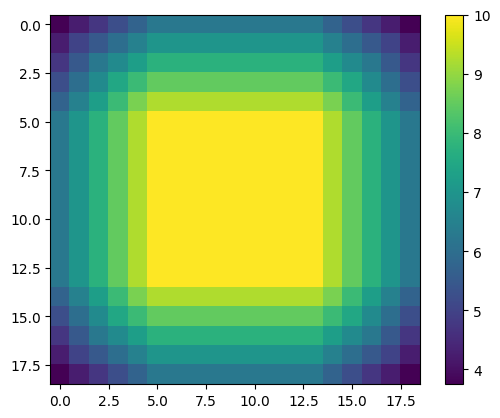

In [10]:
b = np.zeros((21,21), dtype=int)
# Poner los bordes a 3
b[0,:] = b[-1,:] = b[:,0] = b[:,-1] = 3

# # Valid moves
# posiciones_libres = [(x,y) for x in range(1,21) for y in range(1,21)]




        




display(b)

partida = eval_board(b, player=1)
show_positions_to_evaluate(b, player = 1)
partida = eval_board(b, player=2)
show_positions_to_evaluate(b, player = 2)







X X X X X X X X X X X X X X X X X X X X X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X . . . . . . . . . . . . . . . . . . . X
X X X X X X X X X X X X X X X X X X X X X




ValueError: not enough values to unpack (expected 2, got 0)

In [6]:




display(b)

. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . ● . ● . . . . . . . . . .
. . . . . . . . . . . ● . . . . . . . . .
. . . . . . . . . . . . ● . . . . . . . .
. . . . . . . . . . . . . ● . . . . . . .
. . . . . . . . . . . . . . ● . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .
. . . . . . . . . . . . . . . . . . . . .


